<a href="https://colab.research.google.com/github/BojanKomazec/tensorflow-demo-notebooks/blob/main/Simple_linear_regression_with_single_custom_neuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [27]:
#
# Create x and y values for datapoints
#

dataset_x = np.linspace(-1, 1, 100)
print(f'dataset_x.shape = {dataset_x.shape}')

# Our model will need to learn these values
SLOPE = 2
INTERCEPT = -1

rng = np.random.default_rng()
dataset_y = ((SLOPE * dataset_x) + INTERCEPT) + rng.standard_normal(*dataset_x.shape) * 0.33

dataset_x.shape = (100,)


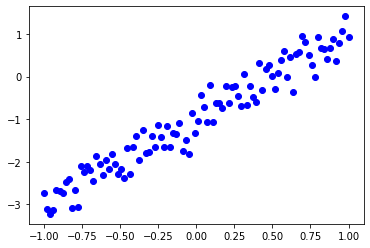

In [28]:
#
# (Optional) Plot data points
#

plt.plot(dataset_x, dataset_y, 'bo')
plt.show()

In [29]:
#
# Create a training and test datasets
#

dataset = list(zip(dataset_x, dataset_y))
print(f'dataset = {dataset}') # list of (x, y) tuples

# Pandas dataframe
df_dataset = pd.DataFrame.from_records(dataset, columns = ['x', 'y'] )

dataset_train = df_dataset.sample(frac=0.8, random_state=0)
print(f'dataset_train.shape = {dataset_train.shape}')
dataset_test = df_dataset.drop(dataset_train.index)
print(f'dataset_test.shape = {dataset_test.shape}')

dataset = [(-1.0, -2.7404509465774405), (-0.9797979797979798, -3.110676063968065), (-0.9595959595959596, -3.223234911887613), (-0.9393939393939394, -3.1394478827538417), (-0.9191919191919192, -2.665599786262668), (-0.898989898989899, -2.6823975980739196), (-0.8787878787878788, -2.7423465596747305), (-0.8585858585858586, -2.465658889803021), (-0.8383838383838383, -2.4104942179324764), (-0.8181818181818181, -3.080601518092509), (-0.797979797979798, -2.6511060625326803), (-0.7777777777777778, -3.056574846850676), (-0.7575757575757576, -2.092848164590285), (-0.7373737373737373, -2.2465191081674707), (-0.7171717171717171, -2.088851588181697), (-0.696969696969697, -2.2006989103362544), (-0.6767676767676767, -2.4610716690484553), (-0.6565656565656566, -1.8679240368524146), (-0.6363636363636364, -2.0458533537134804), (-0.6161616161616161, -2.314413751939998), (-0.5959595959595959, -1.9496765192948284), (-0.5757575757575757, -2.164380577831649), (-0.5555555555555556, -1.826992418267759), (-0.53

In [30]:
#
# Define function which plots a scatter graph of dataset datapoints and a line
# defined with its (x, y) datapoints.
#

def plot_fn(dataset_x, dataset_y, x, y):
  plt.plot(dataset_x, dataset_y, 'bo', label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.legend()
  plt.show()

In [31]:
#
# Define custom artificial neuron
#

# Note: this is not a true perceptron for its activation function is an identity
# function (there is no activation function; no non-linearity on output)
class Perceptron:
  # c-tor
  def __init__(self):
    self.__w = 0
    self.__b = 0

  @property
  def w(self):
    return self.__w

  @property
  def b(self):
    return self.__b

  def fit(self, training_set_data, training_set_labels, epochs, learning_rate):
    n = training_set_data.shape[0]
    print(f'Number of examples in training dataset: {n}')

    # Plot training set
    plt.plot(training_set_data, training_set_labels, 'bo', label='Data')

    # Gradient Descent iterations
    for i in range(epochs):
        # current predicted value of y (hypothesis)
        h = self.__w * training_set_data + self.__b  
        dw = (1/n) * sum((h - training_set_labels) * training_set_data)
        db = (1/n) * sum(h - training_set_labels) 
        self.__w = self.__w - learning_rate * dw 
        self.__b = self.__b - learning_rate * db

        if i % 10 == 0:
          y = self.__w * training_set_data + self.__b
          # Add to a figure a current function approximation (during learning).
          # Observe how it gets closer to the original line.
          plt.plot(training_set_data, y, color='k', label='Predictions')

          # Calculate the current error (loss).
          # Once it starts to converge, we can stop trainging (this is how 
          # number of epochs is determined - empirically)
          LSE = (1/n) * sum(np.square(h - training_set_labels))
          print(f'LSE = {LSE}')

  # Note that the output is linear as activation function is an identity 
  # function.
  def predict(self, data):
    return self.__w * data + self.__b

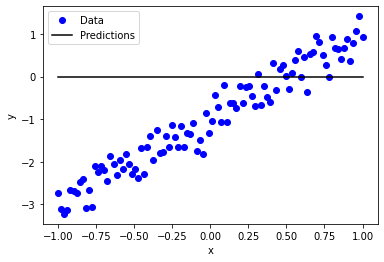

In [32]:
#
# Initialize parameters
#
perceptron = Perceptron()
y = 0

#
# Plot the initial hypothesis
# 
y = perceptron.predict(dataset_x)
plot_fn(dataset_x, dataset_y, dataset_x, y)

Number of examples in training dataset: 80
LSE = 2.52272101777016
LSE = 0.8822456637546738
LSE = 0.4201006810168285
LSE = 0.2366566863346337
LSE = 0.15273112458486493
LSE = 0.11269037683036065
LSE = 0.09337570443346756
LSE = 0.08403275278354505
LSE = 0.07951018077803677
LSE = 0.07732058822727005
LSE = 0.07626045538787884
LSE = 0.0757471662508029
LSE = 0.07549864412301308
LSE = 0.07537831566389228
LSE = 0.0753200554971733
LSE = 0.07529184731434382
LSE = 0.07527818958502257
LSE = 0.07527157683822311
LSE = 0.07526837510393518
LSE = 0.07526682490055314


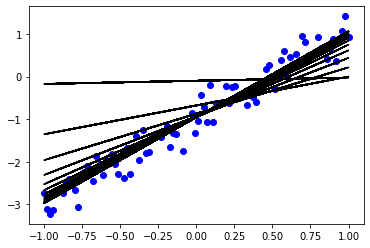

In [33]:
#
# Learn parameters (Gradient Descent algorithm)
#

learning_rate = 0.1
epochs = 200
perceptron.fit(dataset_train['x'], dataset_train['y'], epochs, learning_rate)

In [34]:
#
# Print the values of learned and original model parameters.
#

print(f'Learned slope is {perceptron.w} while original is {SLOPE}')
print(f'Learned intercept is {perceptron.b} while original is {INTERCEPT}')

# k and b are approximations and will not completely match SLOPE and INTERCEPT 
# from the function we used to create a dataset. Increasing epochs numbers can 
# help up to certain level of accuracy.

Learned slope is 2.0180105973931783 while original is 2
Learned intercept is -0.9536945471509858 while original is -1


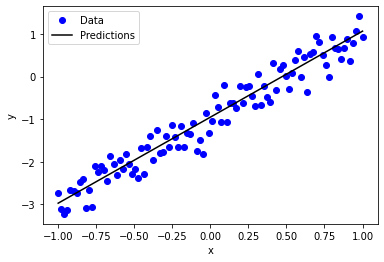

In [35]:
#
# 
# Plot the final function approximation
#

y = perceptron.predict(dataset_x)
plot_fn(dataset_x, dataset_y, dataset_x, y)

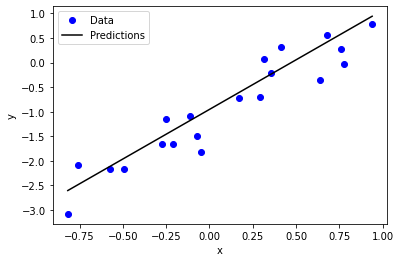

In [36]:
#
# Plot the function approximation on test (validation) set
#

test_y = perceptron.predict(dataset_test['x'])
plot_fn(dataset_test['x'], dataset_test['y'], dataset_test['x'], test_y)

In [37]:
#
# Calculate the loss on validation/test dataset. 
# If model is well trained (approximation is well fitting the ground truth), 
# it should be slighly higher to the one calculated at final training iteration.
#

n = dataset_test.shape[0]
print(f'Number of examples in test dataset: {n}')

LSE = (1/n) * sum(np.square(test_y - dataset_test['y']))
print(f'LSE = {LSE}')

Number of examples in test dataset: 20
LSE = 0.14213602368364225
